# Connecting to Samarjit's dj db

In [7]:
import datajoint as dj
import sys
import h5py
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/gitrepos/samarjit_datajoint/next-app/api/')
import schema
import helpers.pop as pop
import os
sys.path.append('/Users/riekelabbackup/Desktop/Vyom/datajoint/data_modules')
import djutils as dju

In [2]:
host_address, user, password = '127.0.0.1', 'root', 'simple'
dj.config["database.host"] = f"{host_address}"
dj.config["database.user"] = f"{user}"
dj.config["database.password"] = f"{password}"
dj.conn()

DataJoint connection (connected) root@127.0.0.1:3306

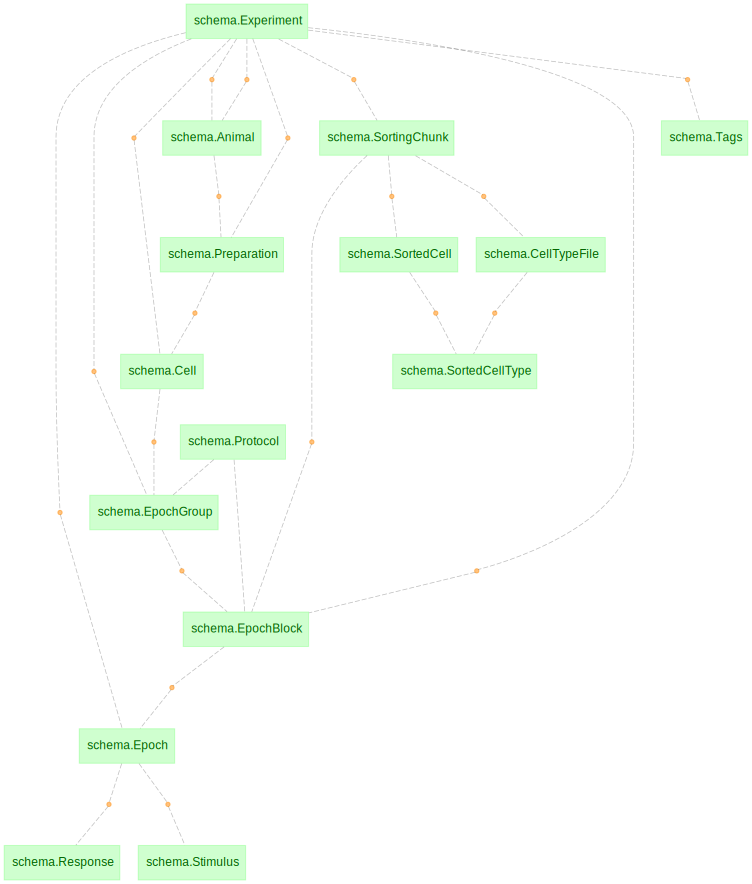

In [3]:
dj.Diagram(schema)

In [4]:
schema.Experiment()

id,h5_uuid,exp_name,meta_file,"data_file empty if MEA for now, maybe should store ""/Volumes/data/data/sorted"" here?",tags_file,"is_mea 1 if MEA, 0 if not",date_added,label,properties,attributes,start_time,experimenter,institution,lab,project,rig,rig_type


In [5]:
import importlib
importlib.reload(pop)
db = dj.VirtualModule('schema.py', 'schema')
data_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/data'
meta_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta'
tags_dir = '/Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/tags'
username = 'vyomr'
pop.append_data(data_dir, meta_dir, tags_dir, username, db)

  0%|          | 0/3 [00:00<?, ?it/s]

Adding /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/led_sawtooth_calibrations_20250210C.json


 33%|███▎      | 1/3 [00:00<00:00,  4.97it/s]

Adding /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/led_sine_calibration_20250207C.json


 67%|██████▋   | 2/3 [00:00<00:00,  2.75it/s]

Adding /Volumes/Vyom MEA/data/samarjit_datajoint/data_dirs/meta/20240229C.json
Adding analysis for experiment 3, 20240229C
Looking in /Volumes/data-1/data/sorted/20240229C


100%|██████████| 3/3 [01:36<00:00, 32.09s/it]


3

In [50]:
import importlib
importlib.reload(dju)
exp_name = '20240229C'
df = dju.get_mea_exp_summary(exp_name)
df.head()

,data_dir,group_label,NDF,chunk_name,protocol_name,experiment_id,group_id,block_id,chunk_id,protocol_id
0,20240229C/data000,noise 3K,1.0,chunk1,manookinlab.protocols.SpatialNoise,3,13,13,3,3
1,20240229C/data001,DOVES 3K,1.0,chunk2,manookinlab.protocols.DovesMovie,3,14,14,1,4
2,20240229C/data002,DOVES 13K,0.5,chunk2,manookinlab.protocols.DovesMovie,3,15,15,1,4
3,20240229C/data003,DOVES 40K,0.0,chunk2,manookinlab.protocols.DovesMovie,3,16,16,1,4
4,20240229C/data004,noise,0.5,chunk2,manookinlab.protocols.SpatialNoise,3,17,17,1,3


In [51]:
schema.Experiment().fetch('exp_name')

array(['led_sawtooth_calibrations_20250210C',
       'led_sine_calibration_20250207C', '20240229C'], dtype=object)

In [58]:
ls_params = ['currentContrast', 'currentFrequency', 'currentRapidOnOff', 'backgroundIntensity']
exp_name = 'led_sawtooth_calibrations_20250210C'
df_e = dju.get_epoch_data(exp_name, ls_params)
df_e.head()

,group_label,epoch_parameters,h5_uuid,device_name,h5path,label,sample_rate,sample_rate_units,offset_hours,offset_ticks,currentContrast,currentFrequency,currentRapidOnOff,backgroundIntensity,group_id,block_id,epoch_id,response_id
0,0.01 mean,"{'NDF': 0, 'amp': 'Amp1', 'led': 'Green LED', ...",6dacde79-79f1-4a6d-9af5-d60c1d415747,Amp1,/experiment-53ca7bba-9b6d-4de1-8088-05cf45020c...,None,10000,Hz,-8,638748050055160196,0.005,60.0,1.0,0.01,1,1,1,1
1,0.01 mean,"{'NDF': 0, 'amp': 'Amp1', 'led': 'Green LED', ...",f5b71b77-df08-4e4d-ba9d-56bb28cba0ea,Amp1,/experiment-53ca7bba-9b6d-4de1-8088-05cf45020c...,None,10000,Hz,-8,638748050073080448,0.010,60.0,1.0,0.01,1,1,2,2
2,0.01 mean,"{'NDF': 0, 'amp': 'Amp1', 'led': 'Green LED', ...",72aed4bf-ce5e-42d5-a67e-e2f42d7a4831,Amp1,/experiment-53ca7bba-9b6d-4de1-8088-05cf45020c...,None,10000,Hz,-8,638748050093043357,0.020,60.0,1.0,0.01,1,1,3,3
3,0.01 mean,"{'NDF': 0, 'amp': 'Amp1', 'led': 'Green LED', ...",230d3941-96d9-4e07-a5c9-bd8e4c43fd63,Amp1,/experiment-53ca7bba-9b6d-4de1-8088-05cf45020c...,None,10000,Hz,-8,638748050113029758,0.005,60.0,0.0,0.01,1,1,4,4
4,0.01 mean,"{'NDF': 0, 'amp': 'Amp1', 'led': 'Green LED', ...",f0b39a1b-4228-4fba-b259-9a2c18270403,Amp1,/experiment-53ca7bba-9b6d-4de1-8088-05cf45020c...,None,10000,Hz,-8,638748050132983290,0.010,60.0,0.0,0.01,1,1,5,5


In [59]:
df_e['group_label'].unique()

array(['0.01 mean', '0.05 mean', '0.1 mean', '0.5 mean'], dtype=object)

In [60]:
import scipy.signal as signal

In [61]:
def time_to_pts(t, sampleRate):
    return np.round(t / 1e3 * sampleRate).astype(int)

def sawtooth_generator(preTime, stimTime, tailTime, contrast, backgroundIntensity,
                       temporalFrequency, polarity, sampleRate):
    prePts = time_to_pts(preTime, sampleRate)
    stimPts = time_to_pts(stimTime, sampleRate)
    tailPts = time_to_pts(tailTime, sampleRate)

    amplitude = contrast * backgroundIntensity
    time = np.arange(stimPts) / sampleRate
    sawtooth = 2* (time * temporalFrequency - np.floor(time * temporalFrequency + 0.5))
    sawtooth = polarity * sawtooth

    sawtooth = backgroundIntensity + amplitude * sawtooth

    data = np.ones(prePts + stimPts + tailPts) * backgroundIntensity
    data[prePts:prePts + stimPts] = sawtooth

    return data

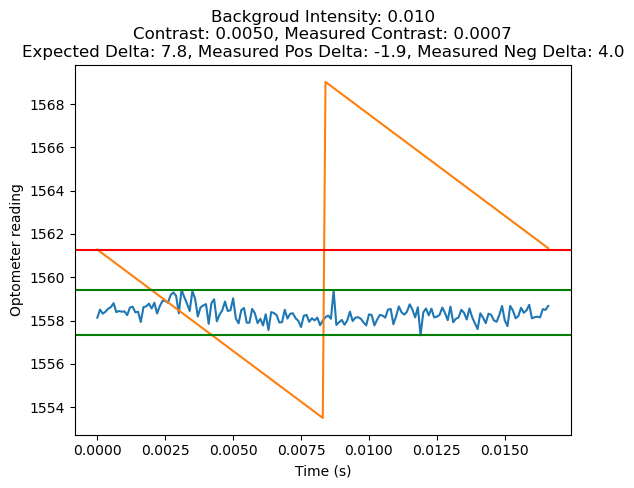

In [62]:
def plot_epoch_data(i_e, df_e, ax=None):
    h5path = df_e['h5path'].iloc[i_e]
    sample_rate = int(df_e['sample_rate'].iloc[i_e])
    epoch_mean = df_e['backgroundIntensity'].iloc[i_e]
    rapidOnOff = df_e['epoch_parameters'].iloc[i_e]['currentRapidOnOff']
    if rapidOnOff:
        polarity = -1
    else:
        polarity = 1
    contrast = df_e['currentContrast'].iloc[i_e]
    temporalFrequency = df_e['epoch_parameters'].iloc[i_e]['currentFrequency']
    preTime = df_e['epoch_parameters'].iloc[i_e]['preTime']
    stimTime = df_e['epoch_parameters'].iloc[i_e]['stimTime']
    tailTime = df_e['epoch_parameters'].iloc[i_e]['tailTime']


    epoch_id = df_e['epoch_id'].iloc[i_e]
    stim_h5path = (schema.Stimulus() & 'parent_id=1' & 'device_name="Green LED"').fetch1('h5path')
    
    str_h5_file = (schema.Experiment() & f'exp_name="{exp_name}"').fetch1('data_file')
    if not os.path.exists(str_h5_file):
        str_h5_file = '/Volumes/data-1/data/h5/led_sawtooth_calibrations_20250210C.h5'
    with h5py.File(str_h5_file, 'r') as f:
        data = f[h5path]['data']['quantity']
        # sawtooth = f[stim_h5path]#['data']['quantity']
        # print(sawtooth.keys())


    time = np.arange(0, len(data)/sample_rate, 1/sample_rate)

    pre_mean = np.mean(data[(time>=(preTime-100)/1e3) & (time<=preTime/1e3)])

    sawtooth = sawtooth_generator(preTime, stimTime, tailTime, contrast, pre_mean,#epoch_mean,
                            temporalFrequency, polarity, sample_rate)
    

    
    # This is michelson contrast. Compute expected delta from pre_mean
    ex_delta = pre_mean*contrast
    ph_distance = 80
    peaks, _ = signal.find_peaks(data, height=pre_mean+ex_delta, 
                                distance=ph_distance)
    troughs, _ = signal.find_peaks(-data, height=-(pre_mean-ex_delta),
                                distance=ph_distance)
    if ax is None:
        # f, ax = plt.subplots(figsize=(25,5))
        f, ax = plt.subplots()
    # ax.plot(time, data, zorder=0)
    # ax.plot(time, sawtooth, c='k', alpha=0.7, zorder=1)
    # ax.axvline(0.5, c='k')
    # ax.axvline(1.5, c='k')
    # ax.set_xlim(0.4,1.5)
    # ax.plot(time[peaks], data[peaks], 'x', c='C1')
    # ax.plot(time[troughs], data[troughs], 'x', c='C1')

    # # Show pre_mean on y-axis
    # ax.axhline(pre_mean, c='r')
    # avg_peak = np.mean(data[peaks])
    # avg_trough = np.mean(data[troughs])
    # ax.axhline(avg_peak, c='g')
    # ax.axhline(avg_trough, c='g')
    # measured_pos_delta = avg_peak - pre_mean
    # measured_neg_delta = pre_mean - avg_trough
    # measured_contrast = (avg_peak - avg_trough)/(avg_peak + avg_trough)
    
    # ylim_scale = 0.02
    # ax.set_ylim(avg_trough - avg_trough*ylim_scale, avg_peak + avg_peak*ylim_scale)
    # str_title = f'Backgroud Intensity: {epoch_mean:.3f}\n' + \
    #             f'Contrast: {contrast:.4f}, Measured Contrast: {measured_contrast:.4f}\n' + \
    #             f'Expected Delta: {ex_delta:.1f}, Measured Pos Delta: {measured_pos_delta:.1f}, Measured Neg Delta: {measured_neg_delta:.1f}'
    # ax.set_title(str_title)
    # ax.set_xlabel('Time (s)')
    # ax.set_ylabel('Optometer reading')

    # Cut pretime and tailtime from data
    data = data[(time>=(preTime/1e3)) & (time<=(preTime+stimTime)/1e3)]

    # Compute cycle average of reading
    samps_per_period = int(np.round(sample_rate/temporalFrequency))
    n_cycles = int(np.floor(len(data)/samps_per_period))

    
    data_by_cycle = np.reshape(data[:n_cycles*samps_per_period], (n_cycles, samps_per_period))
    avg_cycle = np.mean(data_by_cycle, axis=0)
    time_cycle = np.arange(0, len(avg_cycle)/sample_rate, 1/sample_rate)
    avg_peak = np.max(avg_cycle)
    avg_trough = np.min(avg_cycle)
    # pre_mean = np.mean(avg_cycle)
    measured_pos_delta = avg_peak - pre_mean
    measured_neg_delta = pre_mean - avg_trough
    measured_contrast = (avg_peak - avg_trough)/(avg_peak + avg_trough)
    str_title = f'Backgroud Intensity: {epoch_mean:.3f}\n' + \
                f'Contrast: {contrast:.4f}, Measured Contrast: {measured_contrast:.4f}\n' + \
                f'Expected Delta: {ex_delta:.1f}, Measured Pos Delta: {measured_pos_delta:.1f}, Measured Neg Delta: {measured_neg_delta:.1f}'

    # sawtooth_by_cycle = np.reshape(sawtooth[:n_cycles*samps_per_period], (n_cycles, samps_per_period))
    # avg_sawtooth = np.mean(sawtooth_by_cycle, axis=0)

    # get 1 period of sawtooth
    sawtooth_period = sawtooth[time>=preTime/1e3][:samps_per_period]
    ax.plot(time_cycle, avg_cycle)
    ax.plot(time_cycle, sawtooth_period)
    ax.set_title(str_title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Optometer reading')
    ax.axhline(pre_mean, c='r')
    ax.axhline(avg_peak, c='g')
    ax.axhline(avg_trough, c='g')


    return sawtooth

for i_e in range(len(df_e)):
    # i_e = 12
    _ = plot_epoch_data(i_e, df_e)
    break

txt search

In [219]:
import os
import glob
# Get all txt files in dir
str_dir = '/Volumes/data-1/data/metadata/txt/'
ls_files = glob.glob(os.path.join(str_dir, '*.txt'))
len(ls_files)

102

In [221]:
# Load each file and get the one that has 'bleach' in it
for str_file in ls_files:
    with open(str_file, 'r') as f:
        str_data = f.read()
        if 'bleach' in str_data:
            print(str_file)

/Volumes/data-1/data/metadata/txt/20240801C.txt
